## Импортируем нужные библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## Создаем и визуализируем данные

In [3]:
eta=1
# feature
X  = np.random.rand(100,1)
# target
Y = 2 + 3*X + eta*np.random.rand(100,1)

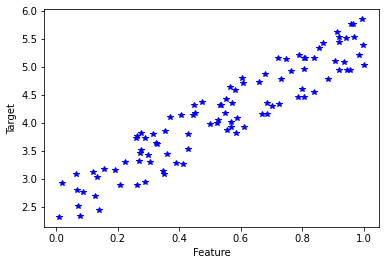

In [5]:
plt.plot(X,Y,'*b')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Рассчитаем коэффициенты линейной регрессии и предскажем таргеты

In [6]:
X_with_ones = np.concatenate((np.ones((100,1)), X), 1)

In [9]:
theta = np.linalg.pinv(X_with_ones).dot(Y)

In [10]:
theta

array([[2.56216873],
       [2.93327766]])

In [12]:
Y_pred = X_with_ones.dot(theta)

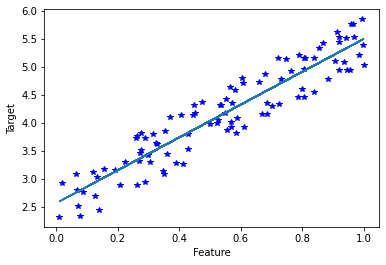

In [13]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Сделаем то же самое с помощью библиотеки sklearn

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X, Y)

LinearRegression()

In [19]:
Y_pred_sklearn = lr.predict(X)

In [21]:
lr.intercept_, lr.coef_

(array([2.56216873]), array([[2.93327766]]))

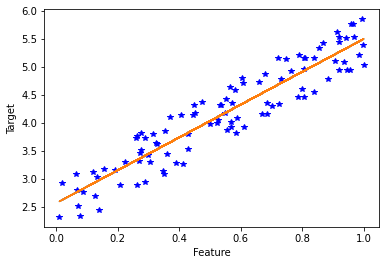

In [22]:
plt.plot(X,Y,'*b')
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_sklearn)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Модель для задачи с несколькими признаками

In [42]:
eta=1
# feature
X  = np.random.rand(100,4)
# target
Y = np.reshape(2 + 3*X[:,0] + 4*X[:,1] + 5*X[:,2] + 6*X[:,3],(100,1)) + eta*np.random.rand(100,1)

In [44]:
Y

array([[11.60879327],
       [15.15500547],
       [12.9706369 ],
       [10.38930896],
       [11.25015575],
       [ 7.12151913],
       [14.73916545],
       [10.04570948],
       [12.81912687],
       [14.10685767],
       [10.14581523],
       [12.41078369],
       [14.70685152],
       [10.81049899],
       [15.74727762],
       [11.76916447],
       [14.59192534],
       [17.76196621],
       [14.41124105],
       [13.40302607],
       [10.45349532],
       [15.29651771],
       [ 7.5249697 ],
       [12.09321147],
       [ 9.58236176],
       [11.70454017],
       [13.2133004 ],
       [11.59198982],
       [11.68300659],
       [10.64156514],
       [ 7.9232449 ],
       [10.99234886],
       [13.72177312],
       [12.12179804],
       [13.08158205],
       [10.4456166 ],
       [ 9.17672837],
       [13.66931422],
       [ 9.53451752],
       [12.23367987],
       [19.39882349],
       [12.01875264],
       [ 9.52948155],
       [15.29990461],
       [10.08698923],
       [13

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
lr.coef_

array([[2.9659326 , 4.02639937, 4.86529281, 6.12899364]])

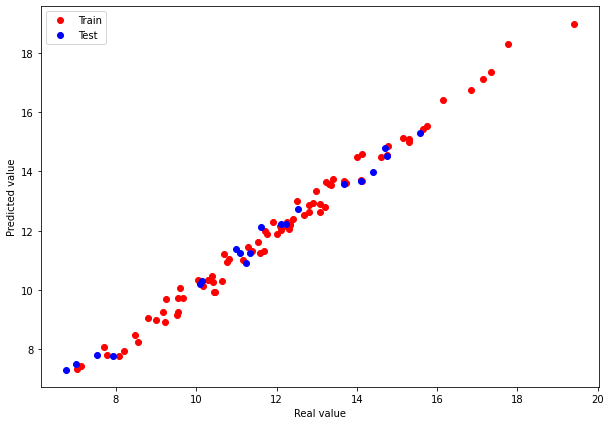

In [57]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'or', label='Train')
plt.plot(y_test, lr.predict(X_test), 'ob', label='Test')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Расчет метрики ошибки

In [59]:
from sklearn.metrics import mean_squared_error as mse

In [60]:
mse(y_test, lr.predict(X_test), squared=False)

0.30487332292813335

## Домашнее задание:

Обучить линейную регрессию, построить зависимость предсказанного от реального значения и рассчитать ошибку (всё для обучающей и тестовой выборок) для датасета сталей и предсказать предел текучести (0.2% Proof Stress (MPa)) на основании состава и температуры

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('../Databases/Steels_kaggle.csv')

In [66]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [65]:
df.shape

(915, 20)

In [67]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [138]:
df[[' C', ' Si']]

,C,Si
0,0.12,0.36
1,0.12,0.36
2,0.12,0.36
3,0.12,0.36
4,0.12,0.36
...,...,...
910,0.22,0.22
911,0.22,0.22
912,0.22,0.22
913,0.22,0.22
